Margento: word2vec & Gensim & SpaCy

In [1]:
import sys
sys.path

['',
 '/Users/christanasescu/anaconda3/lib/python36.zip',
 '/Users/christanasescu/anaconda3/lib/python3.6',
 '/Users/christanasescu/anaconda3/lib/python3.6/lib-dynload',
 '/Users/christanasescu/.local/lib/python3.6/site-packages',
 '/Users/christanasescu/anaconda3/lib/python3.6/site-packages',
 '/Users/christanasescu/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/christanasescu/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/christanasescu/.ipython']

In [2]:
import networkx


In [3]:
import gensim


In [4]:
import nltk


In [5]:
from nltk.corpus import brown


In [6]:
sentences = brown.sents()


In [7]:
model = gensim.models.Word2Vec(sentences, min_count=1)


In [8]:
#min_count (int) – Ignores all words with total frequency lower than this.

A word embedding is an approach to provide a dense vector representation of words that capture 
something about their meaning. 
Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors 
based on a large corpus of text. 
Each word is represented by a point in the embedding space and these points are learned and moved around based on 
the words that surround the target word.
This approach involves defining a word by the company that it keeps that allows the word embedding to learn 
something about the meaning of words. 

The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to 
breakthrough performance with deep neural networks on problems like machine translation.


Word2vec is one algorithm for learning a word embedding from a text corpus.

"This tool provides an efficient implementation of the continuous bag-of-words and skip-gram architectures for computing vector representations of words. These representations can be subsequently used in many natural language processing applications and for further research." (from the Google Code website)

It comes in two 'flavors', CBOW and Skip-gram. CBOW--Continuous Bag of Words
In CBOW you are predicting a target word from source context words. 
In Skip-gram it is the inverse, given a target word, it predicts source context words.

The approach was developed by Tomas Mikolov.


Gensim provides the Word2Vec class for working with a Word2Vec model.



Gensim is a robust open-source vector space modeling and topic modeling toolkit implemented in Python. 
It uses NumPy, SciPy, and optionally Cython for performance.
Developed by Radim Řehůřek


Gensim is specifically designed to handle large text collections, using data streaming and efficient incremental algorithms, which differentiates it from most other scientific software packages that only target batch and in-memory processing. (Wikipedia)

In [9]:
model.save("brown_model")
print ('Brown corpus model saved')

Brown corpus model saved


In [10]:
model = gensim.models.Word2Vec.load("brown_model")
print (model.most_similar("language"))
#print (model.self.ww.most_similar("language"))

[('morality', 0.968712329864502), ('comparison', 0.9676826596260071), ('generally', 0.9661550521850586), ('expressed', 0.9657100439071655), ('staining', 0.9655781984329224), ('evil', 0.9653047323226929), ('innovation', 0.964464008808136), ('speculative', 0.9632176160812378), ('cooling', 0.9631642699241638), ('sex', 0.9631348848342896)]


/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [11]:
#find the odd one out
print (model.doesnt_match('breakfast cereal dinner lunch'.split()))
print (model.doesnt_match('cat dog table'.split()))
#vector representation of word human
print (model["human"])

cereal
table
[-0.50755346  1.0786772   0.69766295  0.73770005  1.1281613  -0.29787976
 -0.91506684 -0.6517206  -0.25082016  0.54907733  1.0825548  -0.19474462
 -0.12295713 -0.18749279 -0.6199777  -0.08651567  0.21135457 -0.10987043
 -1.3096869  -0.33003297  0.23766576 -0.17294934  0.9351747   0.2879215
  1.1344467   0.9580592   0.03413168 -0.46862653 -1.2559923  -0.11105335
 -0.6121916   0.19419096  0.3857062   0.187289   -0.0430116  -0.80140555
  0.07000358 -0.33165976 -0.6041286  -0.6995844  -0.6048206  -0.8894564
 -0.25069687  0.5998084  -0.3059567   0.8713144   0.3893792   0.3849845
  0.87368387 -0.02626109  0.65604174 -0.9884043  -0.37165835 -0.02026881
  0.46064863  0.70750785 -0.52170634  0.76468056 -0.5080336   0.0633708
 -0.22480424  0.43306518 -0.04744358 -0.08135135  0.30841902 -0.49833855
 -0.05080441 -0.8011716   0.5060519  -0.09327721  0.27803668  0.12870848
 -0.08942171 -0.07057188  0.29414982  0.6079837  -0.10224774 -0.39101246
 -0.28839502  0.05096732 -0.31996137 -0.73

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  
/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [12]:
model.similarity('human', 'machine')

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7462051716245925

In [13]:
model.similarity('machine', 'animal')

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9423007790619742

In [14]:
model.similarity('machine', 'inanimate')

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6401452272207124

In [15]:
model.similarity('human', 'computer')

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7105407295876369

In [16]:
model.similarity('machine', 'computer')

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9014954251273815

In [17]:
model.most_similar(positive=['machine'], topn = 4)

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('brace', 0.9811477065086365),
 ('praise', 0.9787366986274719),
 ('herd', 0.9782615303993225),
 ('double', 0.9779195785522461)]

In [18]:
model.most_similar(negative=['machine'], topn = 10)

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('25,000,000', 0.7905954122543335),
 ('egrets', 0.7693808078765869),
 ('pinch-hitter', 0.7418878674507141),
 ('overindulged', 0.7036421298980713),
 ('eva', 0.6785483360290527),
 ('conveying', 0.6679321527481079),
 ('lads', 0.6676516532897949),
 ('Thynnes', 0.6584084630012512),
 ('gibbet', 0.6304527521133423),
 ('20-25', 0.6209086179733276)]

In [19]:
model.most_similar(positive = ['machine'], topn = 10)

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('brace', 0.9811477065086365),
 ('praise', 0.9787366986274719),
 ('herd', 0.9782615303993225),
 ('double', 0.9779195785522461),
 ('crimson', 0.9775288105010986),
 ('cup', 0.9769830107688904),
 ('suit', 0.9761932492256165),
 ('consent', 0.9759433269500732),
 ('warrant', 0.9758354425430298),
 ('violin', 0.9757109880447388)]

Let us try another model.

NLTK includes a pre-trained model which is part of a model that is trained on 100 billion words from the Google News Dataset.

In [20]:
from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))


What does the name say? It was pruned. The initial set was about 3 GB (available at https://code.google.com/p/word2vec/). 
Let us initiate the model and then see to what size it has been pruned:

In [21]:
from gensim.models import KeyedVectors

In [22]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)


“KeyedVectors” is essentially a mapping between entities and vectors. Each entity is identified by its string id, so this is a mapping between {str => 1D numpy array}.

KeyedVectors vs full model: 
KeyedVectors do not support further training. On the other hand, by shedding the internal data structures necessary for training, KeyedVectors offer a smaller RAM footprint and a simpler interface.

for more info, see https://radimrehurek.com/gensim/models/keyedvectors.html 

In [23]:
len(model.vocab)

43981

In [24]:
len(model['machine'])

300

In [25]:
model.most_similar(positive=['machine'], topn = 10)

[('machines', 0.7677488327026367),
 ('machinery', 0.5260840058326721),
 ('Machine', 0.5063986778259277),
 ('Machines', 0.45715785026550293),
 ('apparatus', 0.4539251923561096),
 ('lathes', 0.45199644565582275),
 ('automaton', 0.44719603657722473),
 ('dispenser', 0.4465298652648926),
 ('hobbing', 0.43680340051651),
 ('computer', 0.42776867747306824)]

In [26]:
model.most_similar(negative=['machine'], topn = 10)

[('interfaith', 0.17150536179542542),
 ("Poor's", 0.16424152255058289),
 ('Unmarried', 0.15351945161819458),
 ('Vienne', 0.14776203036308289),
 ('Nations', 0.14426946640014648),
 ('matrimonial', 0.14347968995571136),
 ('Blasphemous', 0.14094440639019012),
 ('Equity', 0.14091116189956665),
 ('Fulbright', 0.14002956449985504),
 ('commencements', 0.1369818150997162)]


Mikolov et al. (2013) figured out that word embeddings capture much of syntactic and semantic regularities. 
For example, the vector 'King - Man + Woman' is close to 'Queen' and 'Germany - Berlin + Paris' is close to 'France'.

In [27]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man']) 

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.7118192911148071),
 ('monarch', 0.6189673542976379),
 ('princess', 0.5902431011199951),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236842632293701),
 ('queens', 0.5181134939193726),
 ('throne', 0.5005807876586914),
 ('royal', 0.4938204884529114),
 ('ruler', 0.4909273684024811),
 ('princes', 0.48108145594596863)]

In [28]:
model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

#most_similar_cosmul() is based on Levy and
#Goldberg's method. The formula is
#*argmax(cos(b*,b)*cos(b*,a*)/(**cos(b*,a)+epsilon**))*

#3CosAdd being a linear sum, allows one large similarity term to dominate the expression. 
#It ignores that each term reflects a different aspect of similarity, and the different aspects have different scales.

#3CosMul, on the other hand - amplifies the differences between small quantities and 
#reduces the differences between larger ones.

#3CosAdd is more susceptible of getting dominated by 1 comparison, as compared to the second method, 3CosMul

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.9314123392105103),
 ('monarch', 0.858533501625061),
 ('princess', 0.8476566672325134),
 ('queens', 0.809981644153595),
 ('prince', 0.8009797930717468),
 ('throne', 0.7853889465332031),
 ('royal', 0.7835603356361389),
 ('ruler', 0.7720382213592529),
 ('goddess', 0.7712306380271912),
 ('Princess', 0.7667570114135742)]

In [29]:
model.wv.most_similar_cosmul(positive=['Paris','Germany'], negative=['Berlin'])

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('France', 0.9849966764450073),
 ('Belgium', 0.8674561381340027),
 ('Spain', 0.8407710790634155),
 ('Italy', 0.8346039056777954),
 ('Switzerland', 0.8240053653717041),
 ('French', 0.8182945847511292),
 ('Morocco', 0.81309974193573),
 ('Europe', 0.8017892241477966),
 ('Netherlands', 0.7938497066497803),
 ('Bordeaux', 0.7927432060241699)]

In [30]:
model.wv.most_similar_cosmul(positive=['writer', 'novelist'], negative=['playwright'])

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('columnist', 0.9119311571121216),
 ('journalist', 0.9025043845176697),
 ('author', 0.8960609436035156),
 ('reporter', 0.8851152658462524),
 ('editor', 0.8748608827590942),
 ('scribe', 0.871620237827301),
 ('sportswriter', 0.8525788187980652),
 ('writers', 0.8515796661376953),
 ('writes', 0.8491745591163635),
 ('newspaperman', 0.8411786556243896)]

In [31]:
model.wv.most_similar_cosmul(positive=['writer', 'novelist'])

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('poet', 0.6610976457595825),
 ('playwright', 0.6517696380615234),
 ('author', 0.64620441198349),
 ('novelists', 0.6419010162353516),
 ('journalist', 0.641152560710907),
 ('dramatist', 0.6224865913391113),
 ('novels', 0.6040788888931274),
 ('writers', 0.5988038778305054),
 ('scribe', 0.5935876369476318),
 ('columnist', 0.5934221148490906)]



Let's build our own model!

In [32]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'about', 'word2vec', 'in', 'our', 'tutorial'],
			['this', 'is', 'the', 'second', 'sentence', 'regarding', 'training', 'our', 'own', 'model'],
			['yet', 'another', 'sentence', 'about', 'the', 'relationship', 'between', 'gensim', 'and', 'word2vec'],
			['one', 'more', 'sentence', 'on', 'how', 'we', 'plan', 'on', 'applying', 'a', 'word2vec', 'model', 'in', 'our', 'further', 'research'],
			['and', 'the', 'final', 'sentence', 'is', 'meant', 'not', 'to', 'draw', 'a', 'conclusion', 'but', 'to', 'get', 'things', 'started', 'on', 'natural', 'language', 'processing']]

In [33]:

from gensim.models import Word2Vec

In [34]:

model = Word2Vec(sentences, min_count=1)

In [35]:

print(model)

Word2Vec(vocab=44, size=100, alpha=0.025)


size = dimensionality of vectors


In [36]:

words = list(model.wv.vocab)

In [37]:

print(words)

['this', 'is', 'the', 'first', 'sentence', 'about', 'word2vec', 'in', 'our', 'tutorial', 'second', 'regarding', 'training', 'own', 'model', 'yet', 'another', 'relationship', 'between', 'gensim', 'and', 'one', 'more', 'on', 'how', 'we', 'plan', 'applying', 'a', 'further', 'research', 'final', 'meant', 'not', 'to', 'draw', 'conclusion', 'but', 'get', 'things', 'started', 'natural', 'language', 'processing']


In [38]:
print(model['sentence'])

[ 4.6788785e-03 -1.3875250e-03  2.4061634e-04 -4.9768081e-03
  3.9597773e-03 -6.7634793e-04 -2.1871633e-03 -8.2890423e-05
 -4.9654753e-03 -3.8009856e-03 -1.1324660e-03  4.9456256e-03
  6.5243134e-04 -1.7872660e-03  1.9776307e-03  1.4887978e-03
 -1.6718052e-03 -2.7795404e-03  4.8079058e-03 -1.4617556e-03
  4.7244839e-03 -2.7981555e-04 -3.7046256e-03  4.6784072e-03
 -1.8329978e-03 -1.0673429e-03 -4.8993342e-03 -3.8446780e-04
 -2.2954373e-03 -4.9665938e-03 -1.4606845e-03 -3.4865383e-03
  9.8846457e-04  1.5010963e-03 -3.1273987e-03 -3.0621965e-03
  3.5104949e-03 -9.6839614e-04 -4.1354266e-03 -1.0525312e-03
 -2.8202010e-03  4.7350707e-03  1.5691754e-03  1.3590318e-03
  9.2941358e-05 -2.3198193e-03 -3.5104123e-03 -4.7689239e-03
 -2.1082617e-03 -3.7057051e-03  3.9603706e-03  2.7374395e-03
 -1.4303523e-04  3.5159206e-03 -9.4029255e-04  1.1848139e-03
  2.0771376e-03 -2.3890242e-03  2.2705477e-03 -4.8400876e-03
 -8.2823652e-05 -1.4923204e-03 -3.0725645e-03  2.9512835e-03
 -1.0717061e-03  4.19737

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.






VISUALIZATION:
PLOTTING WORD VECTORS USING PCA

In [39]:

from sklearn import decomposition
from sklearn import datasets

In [40]:

from sklearn.decomposition import PCA as sklearnPCA

In [41]:

pca = sklearnPCA(n_components=2)

In [42]:
#We need to retrieve all the vectors from a trained model
X = model[model.wv.vocab]

/Users/christanasescu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [43]:

result = pca.fit_transform(X)

In [44]:

import matplotlib.pyplot as plt

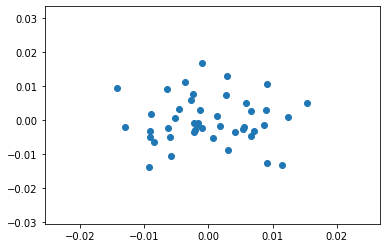

In [45]:

plt.scatter(result[:, 0], result[:, 1])

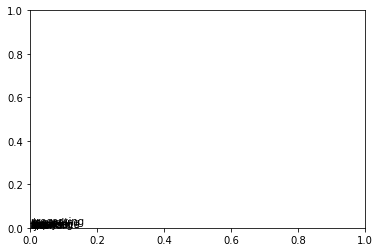

In [ ]:

for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
      
      

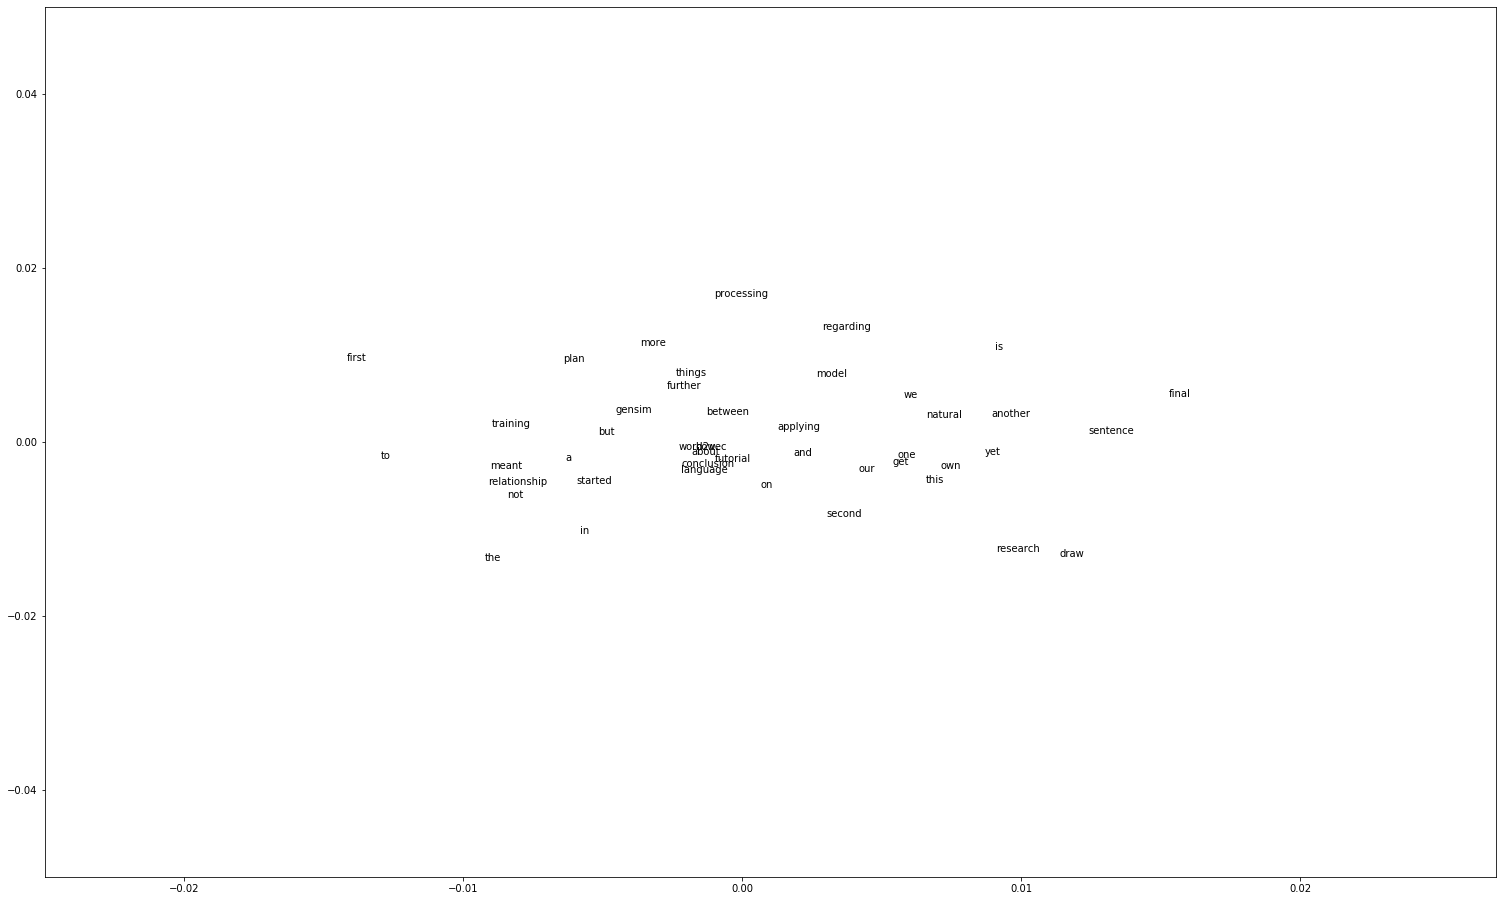

In [ ]:
fig, ax = plt.subplots(figsize=(26, 16))
for i, word in enumerate(words):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#plt.axis([-0.1,0.6,-0.4,0.6])
plt.axis([-0.025,0.027,-0.05,0.05])
plt.show()




Let us return to the Google News Model where we have much more words and see if we can plot those ones as well.

In [ ]:

model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [ ]:

import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['machine'])))  

#the numpy.zeros function returns a new array of given shape and type, filled with zeros.



In [ ]:
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

In [ ]:

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

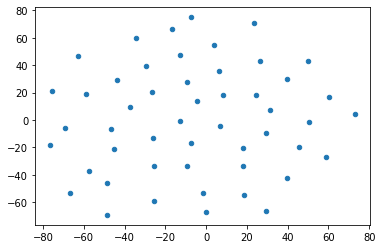

In [ ]:

# Show the scatter plot
#import matplotlib.pyplot as plt
#plt.scatter(Y[:,0], Y[:,1], 20)

In [ ]:

# Adding labels
#for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    #plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10) 
#plt.show()

In [ ]:
# Fixing the dimensions and the axes
#fig, ax = plt.subplots(figsize=(18, 10))
#for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    #plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

#plt.axis([-70,80,-60,70])    
#plt.show()

In [ ]:
#GOING DIRECTLY TO 2 COMPONENTS IN PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X_2 = pca.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(X_2[:,0], X_2[:,1], 20)

In [ ]:
#for label, x, y in zip(labels, X_2[:, 0], X_2[:, 1]):
    #plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10) 
#plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(18, 10))
#for label, x, y in zip(labels, X_2[:, 0], X_2[:, 1]):
    #plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

#plt.axis([0,1.0,0,1.0]) 
#plt.show()



SPACY


In [40]:
import spacy

In [41]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load('en_core_web_sm')


spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. For example, you can suggest a user content that's similar to what they're currently looking at, or label a support ticket as a duplicate if it's very similar to an already existing one.

Each Doc, Span, and Token comes with a .similarity()  method that lets you compare it with another object, and determine the similarity. Of course similarity is always subjective – whether "dog" and "cat" are similar really depends on how you're looking at it. spaCy's similarity model usually assumes a pretty general-purpose definition of similarity.

In [42]:
tokens = nlp(u'machine computer human')

In [43]:

for token1 in tokens:
    for token2 in tokens:
        print(token1.similarity(token2))

1.0
0.6076606
0.20924059
0.6076606
1.0
0.40710005
0.20924059
0.40710005
1.0


In [44]:
tokens = nlp(u'cat dog banana')

In [45]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.similarity(token2))

1.0
0.4759995
0.2811343
0.4759995
1.0
0.51964444
0.2811343
0.51964444
1.0



LET US COMPARE THIS WITH ANOTHER MODEL

In [46]:

nlp2 = spacy.load('en_core_web_lg')

In [47]:
tokens = nlp2(u'machine computer human')

In [9]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.similarity(token2))

1.0
0.53911096
0.23664333
0.53911096
1.0
0.31804404
0.23664333
0.31804404
1.0


the previous model outputted:

1.0
0.6076606
0.20924059
0.6076606
1.0
0.40710005
0.20924059
0.40710005
1.0

Interesting differences, don't you think? What is happening here? "lg" actually stands for large... (so it is a larger version of the same model actually)

In [48]:
tokens = nlp(u'machine computer husband wife')

In [49]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.similarity(token2))

1.0
0.6469107
0.4350918
0.44778153
0.6469107
1.0
0.6723604
0.6301568
0.4350918
0.6723604
1.0
0.54964685
0.44778153
0.6301568
0.54964685
1.0


In [50]:

tokens2 = nlp2(u'machine computer husband wife')

In [51]:
for token1 in tokens2:
    for token2 in tokens2:
        print(token1.similarity(token2))


1.0
0.53911096
0.14169493
0.16131179
0.53911096
1.0
0.20112431
0.18467948
0.14169493
0.20112431
1.0
0.88855284
0.16131179
0.18467948
0.88855284
1.0


In [14]:
tokens = nlp2(u'cat dog banana')

LET US REPEAT THE EVALUATION (the comparison between the three tokens above):

In [15]:
#Code here

In [52]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.similarity(token2))

1.0
0.6469107
0.4350918
0.44778153
0.6469107
1.0
0.6723604
0.6301568
0.4350918
0.6723604
1.0
0.54964685
0.44778153
0.6301568
0.54964685
1.0


the output of the previous model (in fact the small version of the same model) was:
1.0
0.4759995
0.2811343
0.4759995
1.0
0.51964444
0.2811343
0.51964444
1.0


SIMILARITIES IN CONTEXT

Aside from spaCy's built-in word vectors, which were trained on a lot of text with a wide vocabulary, the parsing, tagging and NER models also rely on vector representations of the meanings of words in context. As the processing pipeline is applied spaCy encodes a document's internal meaning representations as an array of floats, also called a tensor. This allows spaCy to make a reasonable guess at a word's meaning, based on its surrounding words. Even if a word hasn't been seen before, spaCy will know something about it. Because spaCy uses a 4-layer convolutional network, the tensors are sensitive to up to four words on either side of a word.

For example, here are three sentences containing the out-of-vocabulary word "labrador" in different contexts.

In [53]:
doc1 = nlp(u"The labrador barked.")
doc2 = nlp(u"The labrador swam.")
doc3 = nlp(u"the labrador people live in canada.")




Even though the model has never seen the word "labrador", it can make a fairly accurate prediction of its similarity to "dog" in different contexts.

In [54]:
for doc in [doc1, doc2, doc3]:
    labrador = doc[1]
    dog = nlp(u"dog")
    print(labrador.similarity(dog))

0.3551335032456585
0.21606150548240183
0.20747180408794746


In [55]:

nlp2 = spacy.load('en_core_web_lg')

In [56]:
doc1 = nlp2(u"The labrador barked.")
doc2 = nlp2(u"The labrador swam.")
doc3 = nlp2(u"the labrador people live in canada.")

In [57]:
for doc in [doc1, doc2, doc3]:
    labrador = doc[1]
    dog = nlp2(u"dog")
    print(labrador.similarity(dog))

0.6349026162074578
0.6349026162074578
0.6349026162074578


Let us consider an even more extraneous word:

In [58]:
doc1 = nlp(u"The vaca is a cow.")

In [59]:
doc2 = nlp(u"The vaca is a rocket flying in the sky.")

In [60]:
doc3 = nlp(u"The vaca teaches computer science at University of Ottawa.")

In [61]:
for doc in [doc1, doc2, doc3]:
    vaca = doc[1]
    cow = nlp(u"cow")
    print(vaca.similarity(cow))

0.15262526013444114
0.14944645135780102
0.14710404655213882


In [66]:
doc1 = nlp2(u"The vaca is a Romanian cow.")

In [67]:
doc2 = nlp2(u"The vaca is a rocket flying in the sky.")

In [68]:
doc3 = nlp2(u"The vaca teaches computer science at University of Ottawa.")

In [70]:
for doc in [doc1, doc2, doc3]:
    vaca = doc[1]
    cow = nlp2(u"cow")
    print(vaca.similarity(cow))

0.19774113847673247
0.19774113847673247
0.19774113847673247


EXERCISE 
Please give an example of your own and let us see what happens ;) :)

In [30]:
#Example and code here

We can also use SpaCy to compare documents.

In [71]:
doc1 = nlp(u"Paris is the largest city in France.")
doc2 = nlp(u"Bucharest is known as the Paris of the East.")
doc3 = nlp(u"It is raining cats and dogs.")

In [72]:
for doc in [doc1, doc2, doc3]:
    for other_doc in [doc1, doc2, doc3]:
        print(doc.similarity(other_doc))

1.0
0.7481934416828289
0.3586287872769439
0.7481934416828289
1.0
0.2550422907466565
0.3586287872769439
0.2550422907466565
1.0


In [73]:

doca = nlp2(u"Paris is the largest city in France.")
docb = nlp2(u"Bucharest is known as the Paris of the East.")
docc = nlp2(u"It is raining cats and dogs.")

In [74]:
for doc in [doca, docb, docc]:
    for other_doc in [doca, docb, docc]:
        print(doc.similarity(other_doc))

1.0
0.8984887188856118
0.6333442927964841
0.8984887188856118
1.0
0.7061499176334926
0.6333442927964841
0.7061499176334926
1.0


Let us run this on the documents we compared earlier with Sklearn!

In [75]:
doc0 = nlp(u"I am interested in NLP and would like to learn more about vectors and vectorizers for language processing.")
doc1 = nlp(u"For those who like to experiment with vectors in dealing with various data, it might be useful to work with NLP vectorizers.")
doc2 = nlp(u"A significant computational experiment involving language will have to involve vectors, so you will want to look into vectorizers.")
doc3 = nlp(u"Even if you are not interested in NLP, you can use vectors to organize your data.")

In [76]:
for doc in [doc0, doc1, doc2, doc3]:
    for other_doc in [doc0, doc1, doc2, doc3]:
        print(doc.similarity(other_doc))

1.0
0.8169793583020156
0.7199810896485045
0.6825172528269977
0.8169793583020156
1.0
0.7322942251394191
0.6457176189427812
0.7199810896485045
0.7322942251394191
1.0
0.6836345732313137
0.6825172528269977
0.6457176189427812
0.6836345732313137
1.0


In [77]:
doca = nlp2(u"I am interested in NLP and would like to learn more about vectors and vectorizers for language processing.")
docb = nlp2(u"For those who like to experiment with vectors in dealing with various data, it might be useful to work with NLP vectorizers.")
docc = nlp2(u"A significant computational experiment involving language will have to involve vectors, so you will want to look into vectorizers.")
docd = nlp2(u"Even if you are not interested in NLP, you can use vectors to organize your data.")

In [38]:
for doc in [doca, docb, docc, docd]:
    for other_doc in [doca, docb, docc, docd]:
        print(doc.similarity(other_doc))

1.0
0.9315390332338347
0.9105727247459804
0.9144584648616282
0.9315390332338347
1.0
0.9473581913993606
0.9411626706881778
0.9105727247459804
0.9473581913993606
1.0
0.9350652847589844
0.9144584648616282
0.9411626706881778
0.9350652847589844
1.0



Do we have the means in scikitlearn to compare documents that directly? Let us go back and have a look. 


The similarity matrix in the NLP--Intro notebook:

In [39]:
[[(1.        ,) (0.23144825,) (0.17254319,) (0.19211725,)]
 [(0.23144825,) (1.        ,) (0.11253336,) (0.298293  ,)]
 [(0.17254319,) (0.11253336,) (1.        ,) (0.02081005,)]
 [(0.19211725,) (0.298293  ,) (0.02081005,) (1.        ,)]]

TypeError: 'tuple' object is not callable

In [78]:
s1 = "I am interested in NLP and would like to learn more about vectors and vectorizers for language processing."
s2 = "For those who like to experiment with vectors in dealing with various data, it might be useful to work with NLP vectorizers."
s3 = "A significant computational experiment involving language will have to involve vectors, so you will want to look into vectorizers."
s4 = "Even if you are not interested in NLP, you can use vectors to organize your data."

In [79]:
texts = ["I am interested in NLP and would like to learn more about vectors and vectorizers for language processing.", "For those who like to experiment with vectors in dealing with various data, it might be useful to work with NLP vectorizers.", "A significant computational experiment involving language will have to involve vectors, so you will want to look into vectorizers.", "Even if you are not interested in NLP, you can use vectors to organize your data."]

In [80]:
from gensim import corpora
from gensim.corpora import Dictionary

In [81]:
from spacy.lang.en import English
parser = English()

In [82]:
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [83]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christanasescu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christanasescu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [85]:
en_stop = set(nltk.corpus.stopwords.words('stop_words_poetry.txt'))

In [87]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 0]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [88]:
text_data = []

for f in texts:
            tokens = prepare_text_for_lda(f)
            text_data.append(tokens)


In [89]:
print(text_data)

[['i', 'interest', 'nlp', 'like', 'learn', 'more', 'vector', 'vectorizers', 'language', 'processing'], ['who', 'like', 'experiment', 'vector', 'dealing', 'various', 'data', 'might', 'useful', 'work', 'nlp', 'vectorizers'], ['significant', 'computational', 'experiment', 'involve', 'language', 'involve', 'vector', 'you', 'want', 'look', 'vectorizers'], ['even', 'if', 'you', 'not', 'interest', 'nlp', 'you', 'can', 'use', 'vector', 'organize', 'your', 'data']]


In [90]:
from gensim import corpora
from gensim.corpora import Dictionary

In [91]:
dictionary = corpora.Dictionary(text_data)

In [92]:
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [94]:
import gensim

In [95]:

ldamodel = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary)

In [96]:
from gensim import similarities
index = similarities.MatrixSimilarity(ldamodel[corpus])

In [97]:
print(index)

MatrixSimilarity<4 docs, 97 features>


In [98]:
index.save("simIndex.index")

In [99]:

s2 = text_data[1]
vec_bow = dictionary.doc2bow(s2)

In [100]:
vec_lda = ldamodel[vec_bow]

In [101]:
sims = index[vec_lda]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(1, 1.0), (0, 0.0), (2, 0.0), (3, 0.0)]


In [102]:
import os

from os import listdir
from os.path import isfile, join

In [103]:
home = os.getcwd()

In [104]:
pwd

'/Users/christanasescu'

In [105]:

data_dir = os.path.join(home, '/US_Poets_Anthology2/')

In [106]:

text_data = []

files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]

for f in files:
    with open(f) as openf:
        for line in openf:
            tokens = prepare_text_for_lda(line)
            text_data.append(tokens)

FileNotFoundError: [Errno 2] No such file or directory: '/US_Poets_Anthology2/'

In [107]:
def get_documents(path):
    os.chdir(path)
    files = [f for f in listdir(path) if isfile(join(path, f))]
    texts = []
    count = -1
    for f in files:
        with codecs.open(f, "r", encoding='utf-8', errors = 'ignore') as openf:
            count = count + 1
            #filelabels[count] = os.path.basename(openf.name)
            splitted_lines = openf.read().splitlines()
            texts.append(splitted_lines)
    #print(filelabels)
    return texts

In [108]:
TEXTS_DIR = home + "/DHSI_BC_Publishing_Sphere_CROWD_and_Place/"

In [109]:
import codecs

In [110]:
documents = get_documents(TEXTS_DIR)

In [111]:
print(documents[0])

['Bibiana:', 'Wanting intimacy with one’s perpetrator is no sickness. Wanting to create a cocoon of normalcy when one is subjected to a crime is no syndrome.', '', '', '*', '', '', '', 'Who is whose stalker.', '(Collision of consonants. Damn. Our sex is based on rhythm!)', '', '', '*', '', '', '', 'The triangle-bend’s', 'center of gravity,', 'forelimb or hindlimb', '', 'Who beats who', 'in the gathering', '', 'The first', 'becomes the second rideress', 'The second', 'becomes the first beforess', '', 'The parasitical line reports', 'to the system operator', '', 'in the dressage parade', 'of hyper-independence', '', 'the Trojan deathdance of skeletons:', '', 'clearly transparent', 'goes on three tracks,', '', 'the charge', 'open', 'stop', ' ', '', '', '*', '', '', '', 'The middle-class-moronic', 'immune defense', 'slimey bounces', 'with the yellow side', 'always up', '', 'My little barn environment', 'in the crush', 'of your incredible', 'impact', '', 'Alternative ending:', 'slit my own 

In [112]:
from string import punctuation

def punctuation_removal(documents):
        new_documents = []
        exclude = set(punctuation)
        for document in documents:
            new_document = ""
            for string_ in document:
                string_no_punc = ''.join(ch for ch in string_ if ch not in exclude)
                lower_string = string_no_punc.lower()
                new_document = " ".join([new_document, lower_string])
            # remove extra spaces in the text
            new_document = ' '.join(new_document.split())
            # use strip to remove leading and trailing spaces
            new_documents.append(new_document.strip())

        return new_documents

In [113]:
new_documents = punctuation_removal(documents)

In [114]:
new_documents[0]

'bibiana wanting intimacy with one’s perpetrator is no sickness wanting to create a cocoon of normalcy when one is subjected to a crime is no syndrome who is whose stalker collision of consonants damn our sex is based on rhythm the trianglebend’s center of gravity forelimb or hindlimb who beats who in the gathering the first becomes the second rideress the second becomes the first beforess the parasitical line reports to the system operator in the dressage parade of hyperindependence the trojan deathdance of skeletons clearly transparent goes on three tracks the charge open stop the middleclassmoronic immune defense slimey bounces with the yellow side always up my little barn environment in the crush of your incredible impact alternative ending slit my own throat at the grand hotell with two l’s in bollnäs the predator circles dimly around the watering hole retreat to the fragile wasp nest for a refill of trashpaper cleptoparasite homevisiting onemanarmy woodpecker in the holiness we’v

In [115]:
text_data = []

for document in new_documents:
    tokens = prepare_text_for_lda(document)
    text_data.append(tokens)

In [116]:
dictionary = corpora.Dictionary(text_data)

In [117]:
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


ldamodel = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary)

from gensim import similarities
index = similarities.MatrixSimilarity(ldamodel[corpus])

In [118]:
index.save("simIndex.index")

In [119]:
text_data[0]

['bibiana',
 'want',
 'intimacy',
 'one',
 '’s',
 'perpetrator',
 'no',
 'sickness',
 'want',
 'create',
 'cocoon',
 'normalcy',
 'when',
 'one',
 'subject',
 'crime',
 'no',
 'syndrome',
 'who',
 'whose',
 'stalker',
 'collision',
 'consonant',
 'damn',
 'our',
 'sex',
 'base',
 'rhythm',
 'trianglebend',
 '’s',
 'center',
 'gravity',
 'forelimb',
 'hindlimb',
 'who',
 'beats',
 'who',
 'gathering',
 'first',
 'become',
 'second',
 'rideress',
 'second',
 'become',
 'first',
 'beforess',
 'parasitical',
 'line',
 'report',
 'system',
 'operator',
 'dressage',
 'parade',
 'hyperindependence',
 'trojan',
 'deathdance',
 'skeleton',
 'clearly',
 'transparent',
 'go',
 'three',
 'track',
 'charge',
 'open',
 'stop',
 'middleclassmoronic',
 'immune',
 'defense',
 'slimey',
 'bounce',
 'yellow',
 'side',
 'always',
 'my',
 'little',
 'barn',
 'environment',
 'crush',
 'your',
 'incredible',
 'impact',
 'alternative',
 'ending',
 'slit',
 'my',
 'own',
 'throat',
 'grand',
 'hotell',
 'two',

In [121]:
p0 = text_data[0]

In [122]:


vec_bow = dictionary.doc2bow(p0)

vec_lda = ldamodel[vec_bow]

sims = index[vec_lda]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

[(0, 1.0), (243, 1.0), (296, 1.0), (348, 1.0), (221, 0.9997568), (28, 0.9207197), (218, 0.65173715), (390, 0.2662965), (222, 0.09138693), (9, 0.019015042), (199, 0.013418684), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.0), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.0), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.

References
Mikolov, Tomas, et al. 2013. "Distributed Representations of Words and Phrases and their Compositionality" 
Le, Quoc and Mikolov, Tomas. 2014. "Distributed Representations of Sentences and Documents
SpaCy. https://spacy.io/
TensorFlow, "Vector Representations of Words"
Brownlee, Jason. 2017. Machine Learning Mastery